### Code by: Apurva Umredkar (50592382)

- Phase 1 accomplishments: Dataset retrieval, data cleaning and exploratory data analysis (EDA). - Oct 8 2024
- Phase 2 objective: More data cleaning, apply ML algorithms for classifying mentality of gamers - Nov 5 2024

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset loaded from the datafetch.ipynb
gaming_dat = pd.read_csv(
    r"../data/online-gaming-anxiety-data/GamingStudy_data.csv", encoding='ISO-8859-1')
# checking the dataset size
gaming_dat.shape, gaming_dat.columns

((13464, 55),
 Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
        'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
        'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
        'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
        'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
        'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
        'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
        'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
        'Birthplace_ISO3'],
       dtype='object'))

In [3]:
# data cleaning: S. No. and timestamp are irrelevant, dropping these columns
gaming_dat = gaming_dat.drop(
    columns=["S. No.", "Timestamp", "highestleague"], axis=1)

# data cleaning 2: replace NaN values to 0
# gaming_dat = gaming_dat.fillna(0)

gaming_dat.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,0,2,2,0,0,3,1,Not difficult at all,2,6,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,0,0,0,0,0,0,0,Not difficult at all,2,5,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,2,1,2,2,2,3,2,Very difficult,2,2,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [4]:
# Start of Code - added for Phase 2 - Oct 29, 2024
# Some more data cleaning is required. Previously I had simply replaced NaN values in the dataset with 0 for an initial EDA
# This approach will not be helpful when we want to apply ML models, so let's update that

# First let's check exactly where we have missing values
gaming_dat.isnull().sum()

GAD1                  0
GAD2                  0
GAD3                  0
GAD4                  0
GAD5                  0
GAD6                  0
GAD7                  0
GADE                649
SWL1                  0
SWL2                  0
SWL3                  0
SWL4                  0
SWL5                  0
Game                  0
Platform              0
Hours                30
earnings              0
whyplay               0
League             1852
streams             100
SPIN1               124
SPIN2               154
SPIN3               140
SPIN4               159
SPIN5               166
SPIN6               156
SPIN7               138
SPIN8               144
SPIN9               158
SPIN10              160
SPIN11              187
SPIN12              168
SPIN13              187
SPIN14              156
SPIN15              147
SPIN16              147
SPIN17              175
Narcissism           23
Gender                0
Age                   0
Work                 38
Degree          

In [5]:
# (From Kaggle data card) Our 3 categories of interest are GAD, SWL & SPIN. Out of which SPIN columns have a lot of null values
from sklearn.impute import SimpleImputer

num_col = ['SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
           'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12',
           'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Hours',
           'streams', 'Narcissism', 'SPIN_T']

# replacing null values in above columns with the average numerical value
numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

for i in num_col:
    gaming_dat[num_col] = numerical_imputer.fit_transform(gaming_dat[num_col])

# there are some other non-numerical columns with null values
# we will replace nulls with maximum occuring value (mode)
categorical_imputer = SimpleImputer(
    missing_values=np.nan, strategy='most_frequent')
categ_cols = ['GADE', 'League', 'Work', 'Degree', 'Reference',
              'accept', 'Residence_ISO3', 'Birthplace_ISO3']

for i in categ_cols:
    gaming_dat[categ_cols] = categorical_imputer.fit_transform(
        gaming_dat[categ_cols])

# End of code - added for phase 2 - Oct 29, 2024

Analysis: What are the age of the gamers present in our dataset and what is the mean age?

Mean age of the gamers: 21


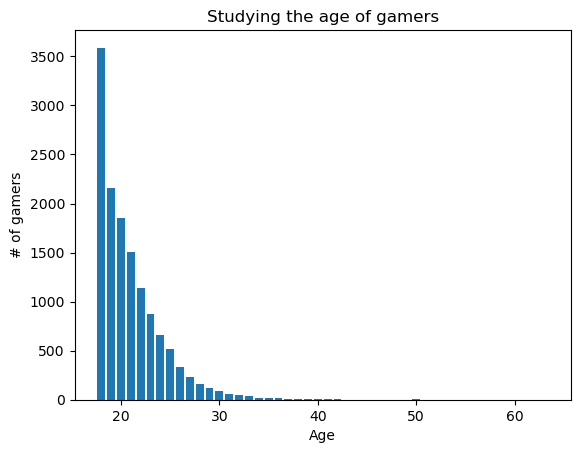

In [6]:
mean_age = np.mean(gaming_dat["Age"])
print(f"Mean age of the gamers: {np.round(mean_age, 0):.0f}")

age_count = gaming_dat['Age'].value_counts().reset_index()
plt.bar(age_count["Age"], age_count["count"])
plt.title("Studying the age of gamers")
plt.xlabel("Age")
plt.ylabel("# of gamers")
plt.show()

We can observe that most of the gamers are of the age 18 and the mean age of the gamers in our dataset is 21.

### Hypothesis 1
#### Which country has the highest average of anxiety levels in online gamers?

Approach: The GAD columns contain metrics for General Anxiety Disorder from category 1 to 7. We will take the average of these and group by country, and get the highest and lowest average value.

**A little background on the anxiety terminologies**

In Psychology, General Anxiety Disorder (GAD) has been divided into 7 categories:
1. GAD-1: Feeling nervous, anxious or on edge
2. GAD-2: Not being able to stop or control worrying
3. GAD-3: Worrying too much about different things
4. GAD-4: Trouble relaxing
5. GAD-5: Being so restless that it is hard to sit still
6. GAD-6: Becoming easily annoyed or irritable
7. GAD-7: Feeling afraid as if something awful might happen

The answer to GAD categories can be 0 - Not at all, 1 - Several days, 2 - More than half the days, 3 - Nearly everyday

SWL refers to Satisfaction with Life.

Here, a survey was conducted to curate this dataset which consisted of 5 questions which had to be answered with a SWL score on a scale of 1-5, 1 being Strongly disagree and 5 being Strongly Agree.

In [7]:
# Step 1: Calculate total GAD score per participant
gaming_dat['GAD_total'] = gaming_dat[['GAD1', 'GAD2',
                                      'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7']].sum(axis=1)

# Step 2: Group by country and calculate average GAD score
country_anxiety = gaming_dat.groupby('Residence_ISO3')['GAD_total'].mean()

# Step 3: Sort countries by average GAD score
country_anxiety_sorted = country_anxiety.sort_values(
    ascending=False).reset_index()

print(f"Based on online gaming data")
print(f"Highest average anxiety: {country_anxiety_sorted.iloc[0, 0]} - {country_anxiety_sorted.iloc[0, 1]}")
print(f"Lowest average anxiety: {country_anxiety_sorted.iloc[-1, 0]} - {country_anxiety_sorted.iloc[-1, 1]} ")

Based on online gaming data
Highest average anxiety: QAT - 16.333333333333332
Lowest average anxiety: FJI - 0.0 


Conclusion: Online gamers from Qatar have the highest anxiety levels and gamers from Fiji have the lowest anxiety levels.

But how about the satisfaction with life? Let's implement the same averaging approach but with SWL scores instead.

In [8]:
gaming_dat['SWL_total'] = gaming_dat[[
    'SWL1', 'SWL2', 'SWL5', 'SWL4', 'SWL5']].sum(axis=1)
country_swl = gaming_dat.groupby('Residence_ISO3')['SWL_total'].mean()
country_swl_sorted = country_swl.sort_values(
    ascending=False).reset_index().rename(columns={"SWL_total": "SWL_avg"})

print(f"Highest SWL average: {country_swl_sorted.iloc[0, 0]} - {country_swl_sorted.iloc[0, 1]}")
print(f"Highest SWL average: {country_swl_sorted.iloc[-1, 0]} - {country_swl_sorted.iloc[-1, 1]}")

print(f"Qatar SWL: {country_swl_sorted.loc[country_swl_sorted['Residence_ISO3'] == 'QAT', 'SWL_avg'].values[0]}")
print(f"Fiji SWL: {country_swl_sorted.loc[country_swl_sorted['Residence_ISO3'] == 'FJI', 'SWL_avg'].values[0]}")

Highest SWL average: NAM - 35.0
Highest SWL average: IDN - 8.0
Qatar SWL: 19.666666666666668
Fiji SWL: 12.0


Findings: Namibia has the highest SWL avg, whereas Indonesia has the least SWL average. Even though gamers in Qatar have the highest anxiety disorder, they have a moderate satisfaction with life.

### Hypothesis 2
#### Which age group suffers from the most anxiety?

In [9]:
# Mapping the GAD statement to the corresponding column names in the dataset
gad_statements = {
    'GAD1': 'Feeling nervous, anxious, or on edge',
    'GAD2': 'Not being able to stop or control worrying',
    'GAD3': 'Worrying too much about different things',
    'GAD4': 'Trouble relaxing',
    'GAD5': 'Being so restless that it`s hard to sit still',
    'GAD6': 'Becoming easily annoyed or irritable',
    'GAD7': 'Feeling afraid as if something awful might happen'
}

statement_columns = list(gad_statements.keys())
statement_labels = list(gad_statements.values())

In [10]:
gaming_dat_copy = gaming_dat.copy()

# Creating bins for age
age_bins = [18, 20, 25, 30, 100]
age_labels = ['18-20', '20-25', '25-30', '30+']
gaming_dat_copy['AgeBin'] = pd.cut(
    gaming_dat_copy.Age, age_bins, labels=age_labels)

# Creating bins for hours played per week
hour_bins = [0, 20, 40, 60, 80, 120]
hour_labels = ['0-20', '20-40', '40-60', '60-80', '80+']
gaming_dat_copy['HoursBin'] = pd.cut(
    gaming_dat_copy.Hours, hour_bins, labels=hour_labels)

# Prepare data for radar charts
radar_data = gaming_dat_copy.groupby(['AgeBin', 'HoursBin'])[
    statement_columns].mean().reset_index()

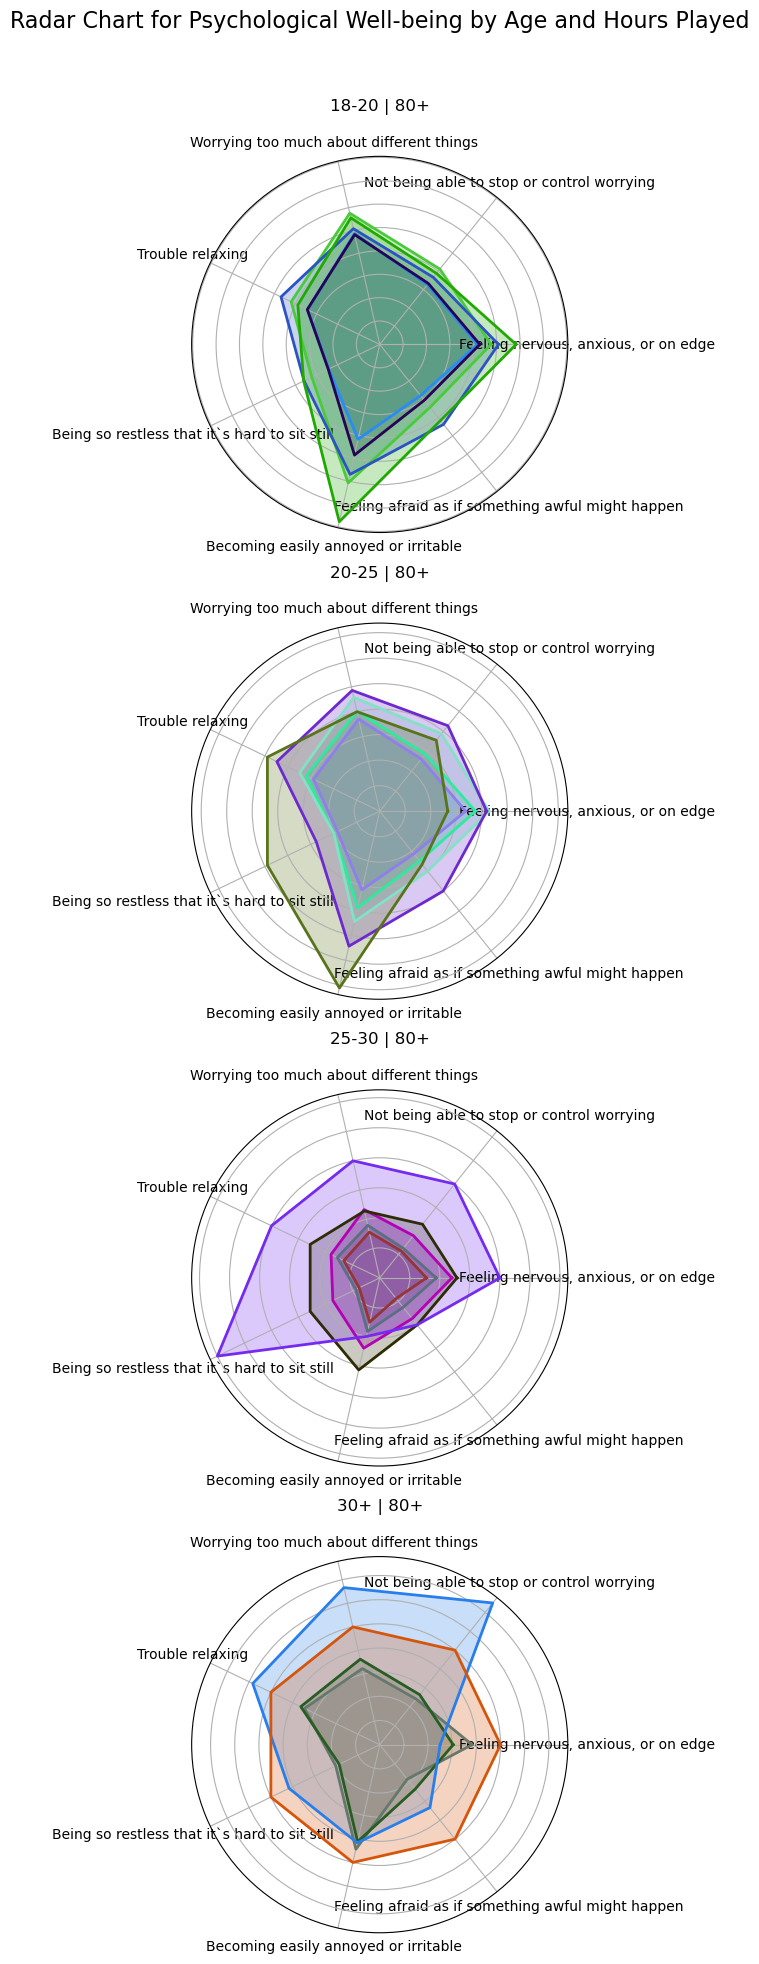

In [11]:
# Number of variables we're plotting (number of statements)
num_vars = len(statement_labels)

# Function to create radar chart


def radar_chart(ax, values, labels, color='blue', fill=True):
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = values.tolist()

    # Ensure values close the loop
    values += values[:1]
    angles += angles[:1]

    # Draw the outline of the radar chart
    ax.plot(angles, values, color=color, linewidth=2)
    if fill:
        ax.fill(angles, values, color=color, alpha=0.25)

    # Set the labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Hide radial ticks
    ax.set_yticklabels([])


# Create subplots for each age zone
fig, axes = plt.subplots(len(age_labels), 1, figsize=(10, 20),
                         subplot_kw=dict(projection='polar'))
if len(age_labels) == 1:
    axes = [axes]  # Ensure axes is a list even for one subplot

# Iterate over each age zone and add radar plots
for idx, age_zone in enumerate(age_labels):
    age_data = radar_data[radar_data['AgeBin'] == age_zone]

    for _, row in age_data.iterrows():
        radar_chart(
            axes[idx],
            row[statement_columns].values,
            statement_labels,
            color=np.random.rand(3,)
        )
        axes[idx].set_title(f"{row['AgeBin']} | {row['HoursBin']}", size=12, color='black', y=1.1)

# Set a title for the entire figure
plt.suptitle("Radar Chart for Psychological Well-being by Age and Hours Played", size=16)

# Adjust the layout to accommodate the title
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Conclusion** \
From the radar charts, it can be seen that young gamers from the age group 18-25 suffer from more anxiety in all areas.

Age group 18-20 & 21-25 is feeling afraid as if something awful might happen (GAD-7) \
Age group 25-30 is mostly restless and find it hard to sit still (GAD-5) \
Ages 30+ are mostly not able to stop or control worrying (GAD-2)


### ****************************************************************************************************************************************************************************
## Phase 2: Applying ML Algorithms

The dataset acquired from Kaggle was curated to study the association of online gaming with 3 mental health aspects: anxiety (GAD), life satisfaction (SWL) and social phobia (SPIN).

In phase 1, using EDA, we studied the trend of anxiety levels and satisfaction of life in different countries and the correlation of anxiety level across different age groups.

In phase 2, our objective is to train ML classifiers/regressors for our hypotheses

Phase 2 approach:
- The dataset in unlabeled.
- We only have numerical responses for our relevant columns GAD 1-7, SWL 1-5 and SPIN 1-15 and the corresponding sum columns GAD_T, SWL_T and SPIN_T .
- These sum columns are of the most relevance for our hypotheses but their values need to be normalized before we can proceed to fit them into our model
- We also need to numerically encode the other columns consisting of features of string data type like Name of Game, Country, Reason to Play, Gender etc.

In [12]:
# Start of code - added for phase 2  - Oct 29, 2024
# required libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import seaborn as sns 
import time

# selecting the columns with object data type
object_cols = gaming_dat.select_dtypes(include='object')
# printing the columns
print(object_cols.columns)
print(f'No. of non-numerical columns: {len(object_cols.columns)}')
    

Index(['GADE', 'Game', 'Platform', 'earnings', 'whyplay', 'League', 'Gender',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'Residence_ISO3', 'Birthplace_ISO3'],
      dtype='object')
No. of non-numerical columns: 16


In [13]:
# (Int) Encoding all the columns with object data type
le = LabelEncoder()
for i in object_cols:
    gaming_dat[i] = le.fit_transform(gaming_dat[i])

In [14]:
# Normalizing the main columns using MinMaxScaler
cols = ['GAD_T', 'SWL_T', 'SPIN_T']
sc = MinMaxScaler()
gaming_dat[cols] = sc.fit_transform(gaming_dat[cols])

#### ML Solution 1: Using clustering and classification algorithms to identify the distress type in online gamers
##### Algorithm 1: K-Means Clustering + Random Forest Classifier

In [15]:
## for visualizing the K-Means clusters, we need to reduce the dimensionality of the dataset from n to 2 features using PCA
pca = PCA(n_components=2)
x = pca.fit_transform(gaming_dat[['GAD_T', 'SWL_T','SPIN_T']])

ml1_time = 0

# Require 3 clusters for Anxiety, Life Satisfaction, and Social Phobia
t0 = time.time()
kmns = KMeans(n_clusters=3, init='k-means++',max_iter = 300, n_init = 40)
y_kmn_clusters = kmns.fit_predict(x)
ml1_time += time.time() - t0

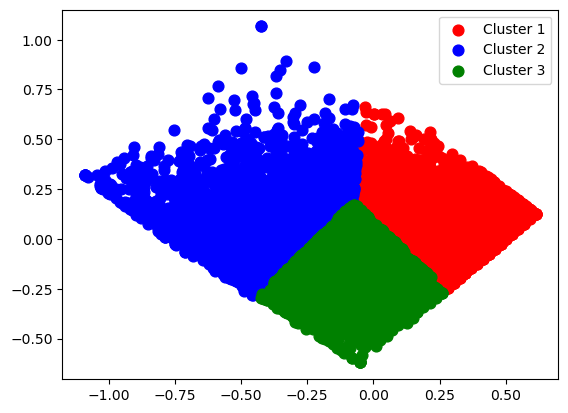

In [16]:
# Plotting the clusters
plt.scatter(x[y_kmn_clusters == 0, 0], x[y_kmn_clusters == 0, 1], s = 60, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmn_clusters == 1, 0], x[y_kmn_clusters == 1, 1], s = 60, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmn_clusters == 2, 0], x[y_kmn_clusters == 2, 1], s = 60, c = 'green', label = 'Cluster 3')
plt.legend()
plt.show()

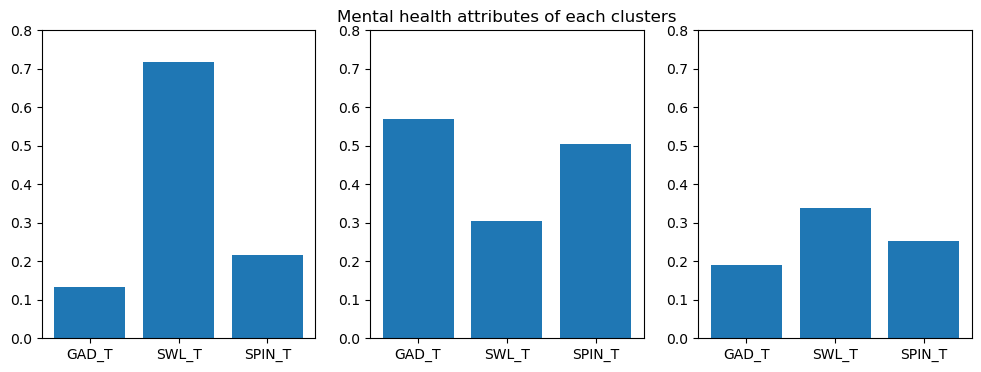

In [17]:
# We have our clusters, but we need insights on the atrributes of each cluster
l1 = gaming_dat[y_kmn_clusters == 0]['GAD_T'].mean()
l2 = gaming_dat[y_kmn_clusters == 0]['SWL_T'].mean()
l3 = gaming_dat[y_kmn_clusters == 0]['SPIN_T'].mean()
c1 = [l1,l2,l3]

l4 = gaming_dat[y_kmn_clusters == 1]['GAD_T'].mean()
l5 = gaming_dat[y_kmn_clusters == 1]['SWL_T'].mean()
l6 = gaming_dat[y_kmn_clusters == 1]['SPIN_T'].mean()
c2 = [l4,l5,l6]

l7 = gaming_dat[y_kmn_clusters == 2]['GAD_T'].mean()
l8 = gaming_dat[y_kmn_clusters == 2]['SWL_T'].mean()
l9 = gaming_dat[y_kmn_clusters == 2]['SPIN_T'].mean()
c3 = [l7,l8,l9]

lbl = ['GAD_T', 'SWL_T', 'SPIN_T']

plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.bar(lbl, c1)
plt.ylim(0,0.8)

plt.subplot(1,3,2)
plt.bar(lbl, c2)
plt.title('Mental health attributes of each clusters')
plt.ylim(0, 0.8)

plt.subplot(1,3,3)
plt.bar(lbl, c3)
plt.ylim(0, 0.8)

plt.show()

From the above clustering, we can observe that:
1. Cluster 1: Satisfied with life, but have anxiety and social phobia
2. Cluster 2: Gamers satisfied with life, low anxiety and low social phobia
3. Cluster 3: High anxiety and social phobia, less satisfaction with life

_NOTE: Cluster attributes may shuffle upon re-run_ 

Now we need to train a classifier for the above clusters

In [18]:
X_train, X_test, y_train_kmns, y_test_kmns = train_test_split(
    gaming_dat, y_kmn_clusters, test_size=0.2, random_state=33)

model_rndm_frst = RandomForestClassifier(n_estimators = 1000, max_depth=8)
t0 = time.time()
model_rndm_frst.fit(X_train, y_train_kmns)
ml1_time += time.time() - t0
y_rndm_frst_pred = model_rndm_frst.predict(X_test)

In [19]:
# evaluating the performance metrics
print(f'Training time: {ml1_time:.5f}s')
print(f'Accuracy: {accuracy_score(y_test_kmns, y_rndm_frst_pred)*100:.3f}%')
print(f'Classification Report: \n{classification_report(y_test_kmns, y_rndm_frst_pred)}')

Training time: 11.23397s
Accuracy: 96.881%
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1143
           1       0.97      0.94      0.96       564
           2       0.97      0.96      0.96       986

    accuracy                           0.97      2693
   macro avg       0.97      0.96      0.97      2693
weighted avg       0.97      0.97      0.97      2693



The random forest classifier gave us an accuracy of around 96% and is robustly trained as per the F1 scores. \
Following is the confusion matrix:

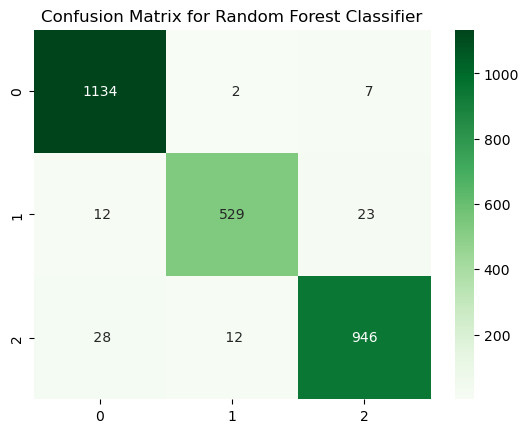

In [20]:
cm = confusion_matrix(y_test_kmns, y_rndm_frst_pred)
sns.heatmap(cm, fmt='3', annot=True, cmap='Greens')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

##### Algorithm 2: Agglomerative Clustering + K-Nearest Neighbors Classifier

Why?

Agglomerative clustering is a hierarchical based clustering algorithm that performs better when the clusters are non-spherical and not of the same size, which we were able to observe when we performed K-means clustering.

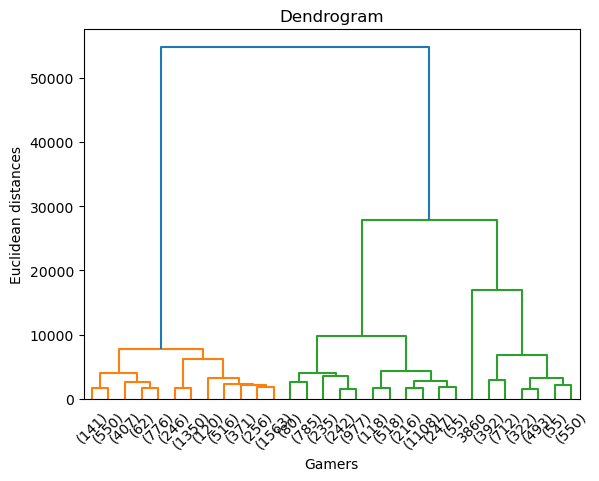

In [21]:
# We will plot a dendrogram to visualize how many number of clusters would be ideal for our objective
dendrogram(linkage(gaming_dat, method = 'ward'), truncate_mode='lastp')
plt.title('Dendrogram')
plt.xlabel('Gamers')
plt.ylabel('Euclidean distances')
plt.show()

A dendrogram is a visual representation used to display the hierarchical relationships between different entities within a dataset

In [22]:
hc = AgglomerativeClustering(n_clusters=3, metric = 'euclidean', linkage='ward')
ml2_time = 0
t0 = time.time()
y_hc_clusters = hc.fit_predict(gaming_dat)
ml2_time += time.time() - t0

In [23]:
X_train, X_test, y_train_hc, y_test_hc = train_test_split(
    gaming_dat, y_hc_clusters, test_size=0.2)

model_knn = KNeighborsClassifier(n_neighbors=3)
t0 = time.time()
model_knn.fit(X_train, y_train_hc)
ml2_time += time.time() -t0

y_knn_pred = model_knn.predict(X_test)

Training time: 8.36351s
Accuracy: 99.889%
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       514
           1       1.00      1.00      1.00      1275
           2       1.00      1.00      1.00       904

    accuracy                           1.00      2693
   macro avg       1.00      1.00      1.00      2693
weighted avg       1.00      1.00      1.00      2693



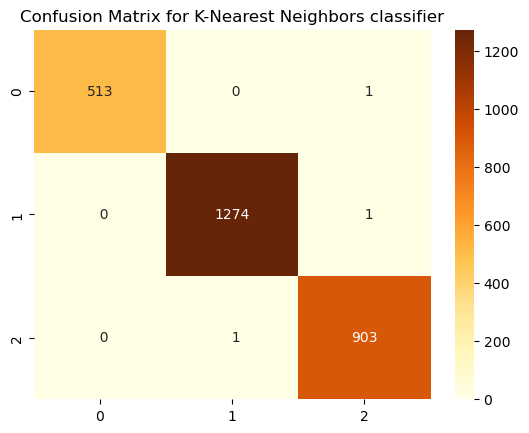

In [24]:
print(f'Training time: {ml2_time:.5f}s')
print(f'Accuracy: {accuracy_score(y_test_hc, y_knn_pred)*100:.3f}%')
print(f'Classification Report: \n{classification_report(y_test_hc, y_knn_pred)}')

cm = confusion_matrix(y_test_hc, y_knn_pred)
sns.heatmap(cm, fmt='3', annot=True, cmap='YlOrBr')
plt.title('Confusion Matrix for K-Nearest Neighbors classifier')
plt.show()

**Conclusion:** Agglomerative clustering with K-Nearest Neigbors algorithm was able to classify the the mental health aspect of online gamers with a better accuracy than K-Means clustering with Random Forest, and has a faster training time.

#### ML Solution 2: Using regression algorithms to measure anxiety, satisfaction with life and social phobia based on age, game played and country of residence
##### Algorithm 1: Random Forest Regressor

In [25]:
# our data is already cleaned, labeled and normalized
# fetching the required columns for fitting into our regression model
m2_data = gaming_dat[['Age', 'Game', 'Residence']]
m2_output = gaming_dat[['GAD_T', 'SWL_T', 'SPIN_T']]

m2_data, m2_output

(       Age  Game  Residence
 0       25     8        103
 1       41     7        103
 2       32     7         34
 3       28     7        103
 4       19     7         90
 ...    ...   ...        ...
 13459   22     7         32
 13460   20     6        103
 13461   19     9         71
 13462   18     7         15
 13463   19     9         15
 
 [13464 rows x 3 columns],
           GAD_T     SWL_T    SPIN_T
 0      0.047619  0.600000  0.073529
 1      0.380952  0.366667  0.485294
 2      0.380952  0.400000  0.455882
 3      0.000000  0.400000  0.161765
 4      0.666667  0.300000  0.191176
 ...         ...       ...       ...
 13459  0.190476  0.766667  0.102941
 13460  0.952381  0.600000  0.367647
 13461  0.000000  0.900000  0.147059
 13462  0.619048  0.366667  0.470588
 13463  0.095238  0.666667  0.205882
 
 [13464 rows x 3 columns])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(m2_data, m2_output, test_size=0.2)

ml3_time = 0
reg1 = MultiOutputRegressor(RandomForestRegressor(n_estimators= 300))
t0 = time.time()
reg1.fit(X_train, y_train)
ml3_time += time.time() - t0

y1_pred = reg1.predict(X_test)
mse = mean_squared_error(y_test, y1_pred, multioutput='raw_values')
print(f'Training time: {ml3_time:.5f}s')
print("MSE for GAD:", mse[0])
print("MSE for SWL:", mse[1])
print("MSE for SPIN:", mse[2])

Training time: 7.40712s
MSE for GAD: 0.05459022160643289
MSE for SWL: 0.06283030022531992
MSE for SPIN: 0.040233313886160464


##### Algorithm 2: MLP Regressor

In [27]:
ml4_time = 0
reg2 = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(50, 30),
                                         activation='relu',
                                         solver='adam',
                                         learning_rate_init=0.001,
                                         max_iter = 500,
                                         alpha = 0.01))
t0 = time.time()
reg2.fit(X_train, y_train)
ml4_time += time.time() - t0
y2_pred = reg2.predict(X_test)
mse = mean_squared_error(y_test, y2_pred, multioutput='raw_values')
print(f'Training time: {ml4_time:.5f}s')
print("MSE for GAD:", mse[0])
print("MSE for SWL:", mse[1])
print("MSE for SPIN:", mse[2])

Training time: 6.32010s
MSE for GAD: 0.052875792317588696
MSE for SWL: 0.05960267126423883
MSE for SPIN: 0.0388104894228817


Testing our regressors with a custom input

In [28]:
#the old label encoder is lost, for testing purpose, I am re-creating the Label Encoder for Game and Country columns of the dataset
g_dat = pd.read_csv(r'../data/online-gaming-anxiety-data/GamingStudy_data.csv', encoding='ISO-8859-1')
le_game = LabelEncoder().fit(g_dat['Game'])
le_country = LabelEncoder().fit(g_dat['Residence'])

def test(age: int, game: str, country: str)->None:
    # transforming the input to format acceptable to our regressors:
    x_cust = np.array([age, le_game.transform([game])[0], le_country.transform([country])[0]]).reshape(1,3)
    y1 = reg1.predict(x_cust)
    y2 = reg2.predict(x_cust)
    y1_cust = sc.inverse_transform(y1)[0]
    y2_cust = sc.inverse_transform(y2)[0]
    print(f'With Random Forest Regressor:\n\tGAD_T: {y1_cust[0]}\tSWL_T: {y1_cust[1]}\tSPIN_T: {y1_cust[2]}')
    print(f'With MLP Regressor:\n\tGAD_T: {y2_cust[0]}\tSWL_T: {y2_cust[1]}\tSPIN_T: {y2_cust[2]}')

# Passing Age, Game name, Country name as input
test(23, 'Counter Strike', 'India')

With Random Forest Regressor:
	GAD_T: 4.964777777777779	SWL_T: 13.008749278499272	SPIN_T: 18.289373015873014
With MLP Regressor:
	GAD_T: 4.048610159728923	SWL_T: 20.844239043681302	SPIN_T: 19.46392104282288


In [29]:
# If you want to test using your custom input, here are the unique countries and games that are available in the dataset
# that can be used

## Games:
#        'Skyrim', 'Other', 'World of Warcraft', 'League of Legends',
#        'Starcraft 2', 'Counter Strike', 'Destiny', 'Diablo 3',
#        'Heroes of the Storm', 'Hearthstone', 'Guild Wars 2'

## Countries:
#        'USA', 'Germany', 'South Korea', 'Japan', 'Finland', 'Canada',
#        'Australia', 'UK', 'Bosnia and Herzegovina', 'Ireland', 'Malaysia',
#        'Romania', 'Sweden', 'Greece', 'Turkey', 'Belgium', 'Latvia',
#        'Austria', 'South Africa', 'Croatia', 'Switzerland', 'India',
#        'Netherlands', 'Denmark', 'Portugal', 'France', 'Argentina',
#        'Estonia', 'Russia', 'Czech Republic', 'Lithuania', 'Norway',
#        'Singapore', 'Poland', 'China', 'Unknown', 'Serbia', 'Morocco',
#        'Spain', 'Saudi Arabia', 'Slovakia', 'Bulgaria', 'Italy',
#        'Slovenia', 'Jordan', 'Brazil', 'Venezuela', 'Tunisia', 'Israel',
#        'Qatar', 'Ukraine', 'Mexico', 'Macedonia', 'Philippines',
#        'Hungary', 'Egypt', 'Iceland', 'New Zealand ', 'Luxembourg',
#        'Cyprus', 'Algeria', 'UAE', 'Belarus', 'Chile', 'Lebanon',
#        'Thailand', 'Peru', 'Namibia', 'Uruguay', 'Kuwait', 'Bangladesh',
#        'Malta', 'Syria', 'Colombia', 'Dominican Republic', 'Nicaragua',
#        'Hong Kong', 'Vietnam', 'Kazakhstan', 'Albania', 'Guadeloupe',
#        'Grenada', 'Trinidad & Tobago', 'Panama', 'Indonesia',
#        'Liechtenstein', 'Puerto Rico', 'Taiwan', 'Costa Rica', 'Belize',
#        'Jamaica', 'Georgia', 'Faroe Islands', 'Guatemala', 'Moldova',
#        'Mongolia', 'Honduras', 'Montenegro', 'Bahrain', 'Bolivia',
#        'El Salvador', 'Ecuador', 'Pakistan', 'Republic of Kosovo',
#        'St Vincent', 'Brunei', 'Fiji', 'Gibraltar ', 'Palestine'

**Conclusion:** Random Forest and MLP based Regressors both have good accuracy based on above training results. MLP is slightly faster in training.

## Phase 3: Building a data product

#### Objective
We aim to create a web-based platform that deploys the MLP regressor model. The platform will allow users to input key parameters through an intuitive web interface, and it will output predicted metrics for anxiety, satisfaction with life (SWL), and social phobia. These insights will help users identify areas of their mental health that may require attention and provide actionable feedback to improve their overall well-being.

Approach:
1. The cleaned dataset will be saved in CSV format and loaded into PySpark as a persistent database for efficient data handling and queries.
2. The MLP regressor model will be trained again during Phase 3, incorporating an additional parameter, 'Hours Played,' as it is expected to significantly impact the predictions. The trained model will be saved as a pickle file and integrated into the web application for deployment.
3. The web platform will be developed using Streamlit for the user interface and FastAPI for backend API functionalities.

NOTE: Web platform development is done in a separate .py file named *gmh_web.py*


In [30]:
# saving the cleaned dataset so that it can be later used in PySpark
gaming_dat.to_csv(r"../data/online-gaming-anxiety-data/online_gaming_clean.csv")
print("Cleaned dataset saved as .CSV file in data/online-gaming-anxiety-data folder.")

Cleaned dataset saved as .CSV file in data/online-gaming-anxiety-data folder.


In [31]:
# training a new MLP regressor model with 4 parameters
mlp_final_data = gaming_dat[['Age', 'Game', 'Residence', 'Hours']]
mlp_final_output = gaming_dat[['GAD_T', 'SWL_T', 'SPIN_T']]

X_train, X_test, y_train, y_test = train_test_split(mlp_final_data, mlp_final_output, test_size=0.2, random_state=42)

mlp_reg_final = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=(100, 40),
                                         activation='relu',
                                         solver='adam',
                                         learning_rate_init=0.005,
                                         max_iter = 1000,
                                         alpha = 0.02, random_state=42))

mlp_reg_final.fit(X_train, y_train)

y_pred = mlp_reg_final.predict(X_test)
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')

print("MSE for GAD:", mse[0])
print("MSE for SWL:", mse[1])
print("MSE for SPIN:", mse[2])

#saving the model 
import pickle
with open(r"../data/online-gaming-anxiety-data/gmh_model.pickle", "wb") as file:
    pickle.dump(mlp_reg_final, file)

print("MLP regressor model saved as .PICKLE file in data/online-anxiety-gaming-data folder.")

MSE for GAD: 0.1623487330886398
MSE for SWL: 0.19444052729662445
MSE for SPIN: 0.04346593684242377
MLP regressor model saved as .PICKLE file in data/online-anxiety-gaming-data folder.
